## Local Distances

In [1]:
import sys 
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.


FIt-SNE repository not detected. Functionality will be disabled.


/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [2]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1652, 500)

In [4]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1653, 500)

In [5]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}}

In [6]:
# choose value for K-nearest neighbor calculations. We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

---

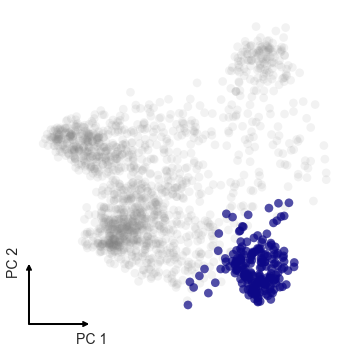

In [7]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['5']) # rods & cones

In [8]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_PCA2.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_PCA2.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'], final_distance_stats['Retina']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.2908
EMD: 0.3872
KLD: 0.1791
Knn Pres.: 82.455
CPU times: user 506 ms, sys: 26.3 ms, total: 532 ms
Wall time: 569 ms


CPU times: user 18.2 s, sys: 470 ms, total: 18.7 s
Wall time: 18.6 s


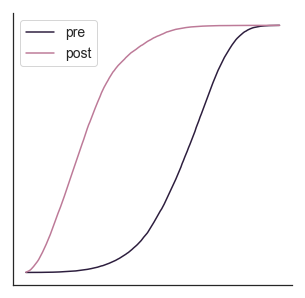

<Figure size 504x504 with 0 Axes>

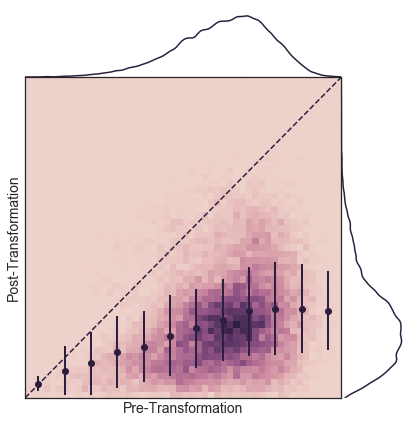

In [9]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

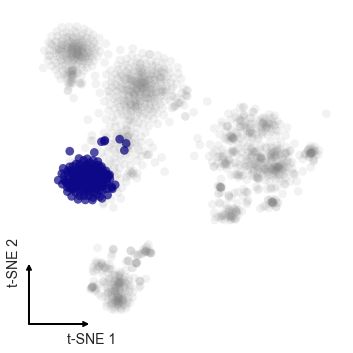

In [10]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_tSNE.plot_barcodes(ranks=['5']) # rods & cones

In [11]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_tSNE.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_tSNE.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'], final_distance_stats['Retina']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3294
EMD: 0.3565
KLD: 0.1552
Knn Pres.: 79.125
CPU times: user 508 ms, sys: 29 ms, total: 537 ms
Wall time: 543 ms


CPU times: user 18.1 s, sys: 396 ms, total: 18.5 s
Wall time: 18.3 s


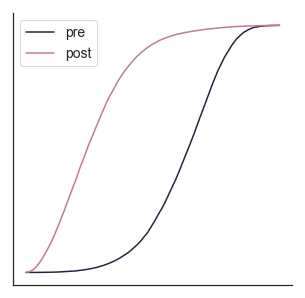

<Figure size 504x504 with 0 Axes>

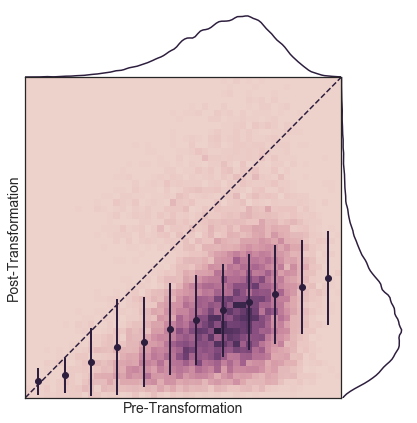

In [12]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

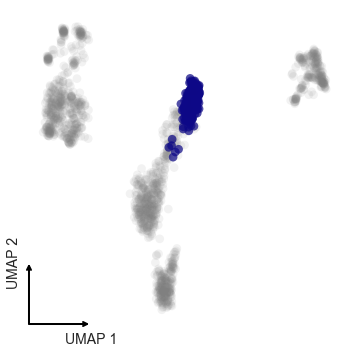

In [13]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_UMAP.plot_barcodes(ranks=['5']) # rods & cones

In [14]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_UMAP.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_UMAP.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'], final_distance_stats['Retina']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.0193
EMD: 0.3952
KLD: 0.241
Knn Pres.: 76.75
CPU times: user 554 ms, sys: 29.3 ms, total: 584 ms
Wall time: 555 ms


CPU times: user 17.8 s, sys: 403 ms, total: 18.2 s
Wall time: 17.8 s


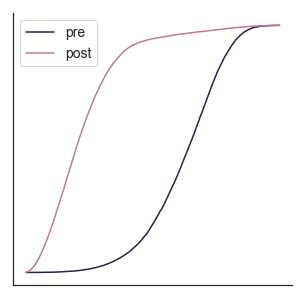

<Figure size 504x504 with 0 Axes>

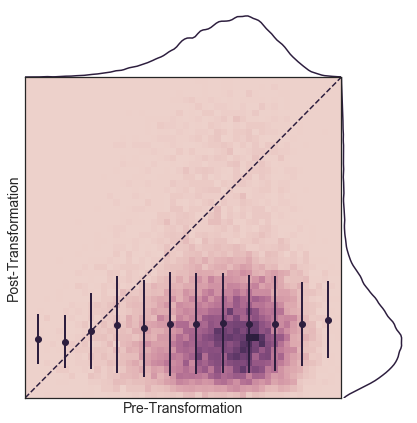

In [15]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

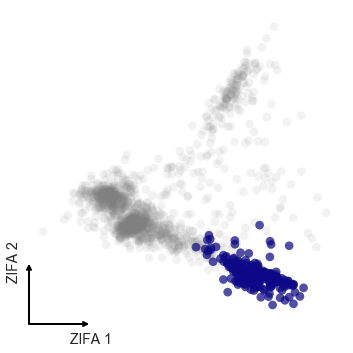

In [16]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_ZIFA.plot_barcodes(ranks=['5']) # rods & cones

In [17]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform='arcsinh'), post=retina_ZIFA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['5']), post=retina_ZIFA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'], final_distance_stats['Retina']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.2285
EMD: 0.365
KLD: 0.2249
Knn Pres.: 77.57
CPU times: user 549 ms, sys: 29.9 ms, total: 579 ms
Wall time: 554 ms


CPU times: user 18.4 s, sys: 476 ms, total: 18.9 s
Wall time: 18.6 s


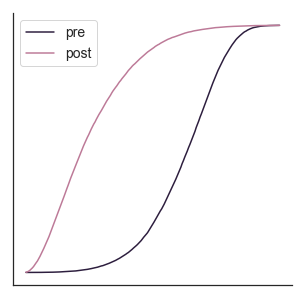

<Figure size 504x504 with 0 Axes>

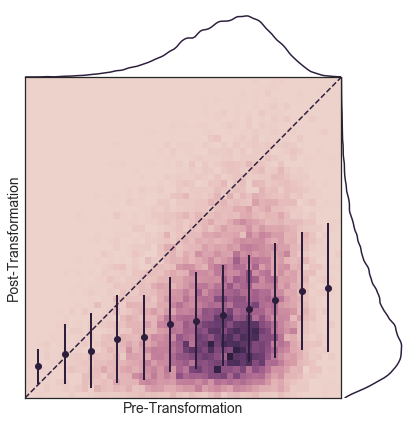

In [18]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

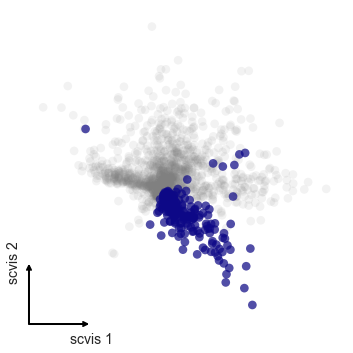

In [19]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_scvis.plot_barcodes(ranks=['5']) # rods & cones

In [20]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_scvis.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_scvis.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'], final_distance_stats['Retina']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.7714
EMD: 0.0516
KLD: 0.0997
Knn Pres.: 90.175
CPU times: user 475 ms, sys: 19.8 ms, total: 495 ms
Wall time: 500 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 17.5 s, sys: 510 ms, total: 18.1 s
Wall time: 17.8 s


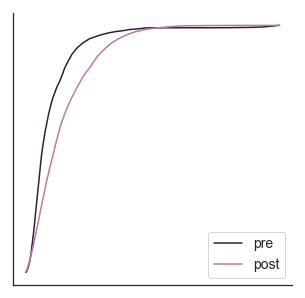

<Figure size 504x504 with 0 Axes>

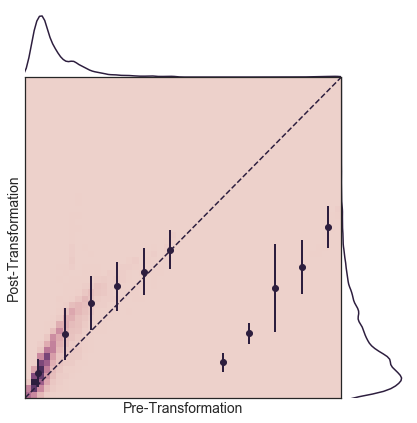

In [21]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

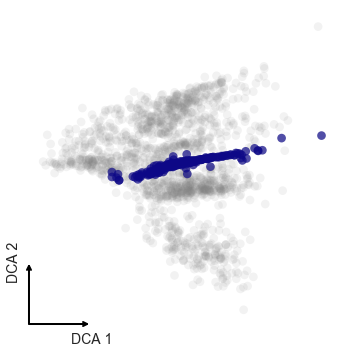

In [74]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv', name='DCA', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_DCA.plot_barcodes(ranks=['5']) # rods & cones

In [75]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_DCA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_DCA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'], final_distance_stats['Retina']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.7334
EMD: 0.0654
KLD: 0.2158
Knn Pres.: 84.775
CPU times: user 552 ms, sys: 38.5 ms, total: 591 ms
Wall time: 633 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.8 s, sys: 418 ms, total: 19.2 s
Wall time: 18.6 s


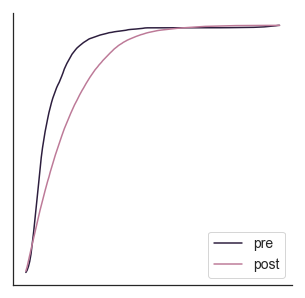

<Figure size 504x504 with 0 Axes>

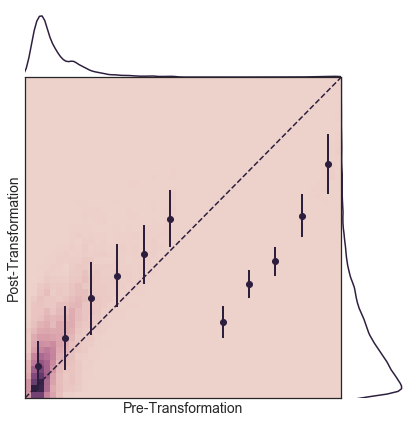

In [76]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

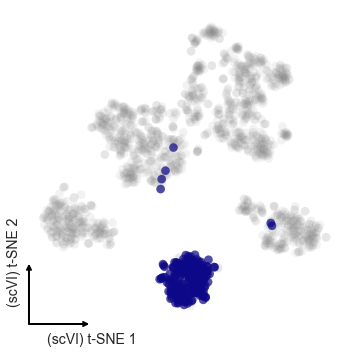

In [25]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv.gz', name='scVI', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu_seurat.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['5']) # rods & cones

In [26]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_scVI.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_scVI.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'], final_distance_stats['Retina']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.0882
EMD: 0.289
KLD: 0.4076
Knn Pres.: 76.915
CPU times: user 592 ms, sys: 29.2 ms, total: 622 ms
Wall time: 589 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18 s, sys: 468 ms, total: 18.5 s
Wall time: 18.6 s


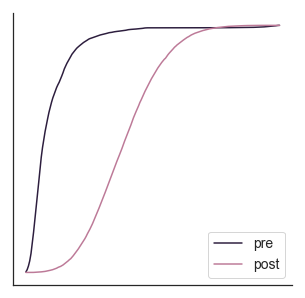

<Figure size 504x504 with 0 Axes>

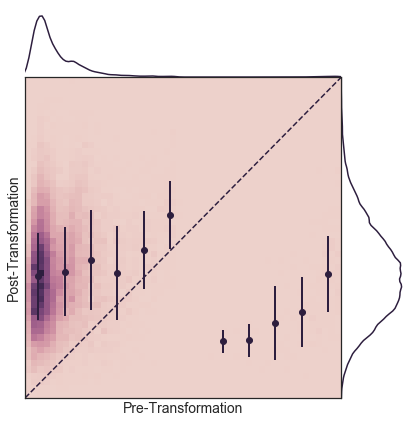

In [27]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

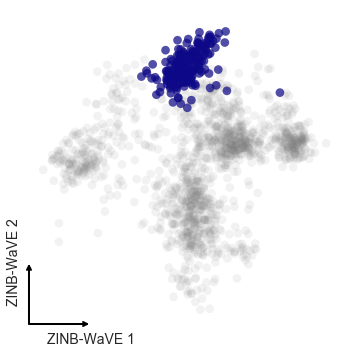

In [77]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['5']) # cones
retina_ZINBWAVE.plot_barcodes(ranks=['5'], figsize=(4,4), save_to='../images/cones_ZINBWAVE.png')

In [78]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_ZINBWAVE.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_ZINBWAVE.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINBWAVE'], final_distance_stats['Retina']['EMD']['ZINBWAVE'], final_distance_stats['Retina']['KLD']['ZINBWAVE'], final_distance_stats['Retina']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3115
EMD: 0.0938
KLD: 0.3828
Knn Pres.: 76.88
CPU times: user 606 ms, sys: 27.8 ms, total: 634 ms
Wall time: 614 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 19.1 s, sys: 399 ms, total: 19.5 s
Wall time: 19 s


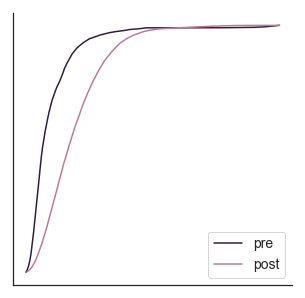

<Figure size 504x504 with 0 Axes>

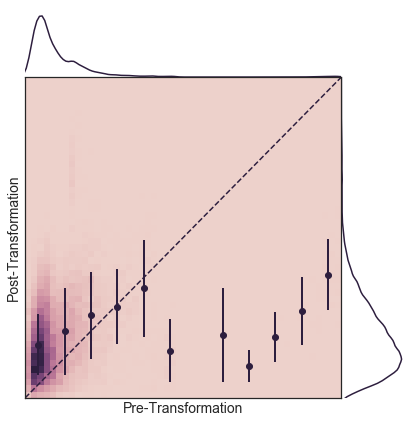

In [79]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

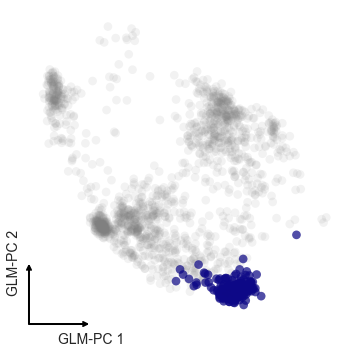

In [80]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv', name='GLM-PC', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_GLMPCA.plot_barcodes(ranks=['5']) # rods & cones

In [81]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_GLMPCA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_GLMPCA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLMPCA'], final_distance_stats['Retina']['EMD']['GLMPCA'], final_distance_stats['Retina']['KLD']['GLMPCA'], final_distance_stats['Retina']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.1152
EMD: 0.0445
KLD: 0.5585
Knn Pres.: 76.595
CPU times: user 505 ms, sys: 15.9 ms, total: 521 ms
Wall time: 526 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.9 s, sys: 358 ms, total: 19.3 s
Wall time: 19 s


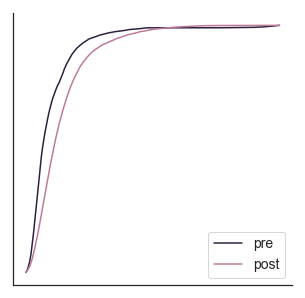

<Figure size 504x504 with 0 Axes>

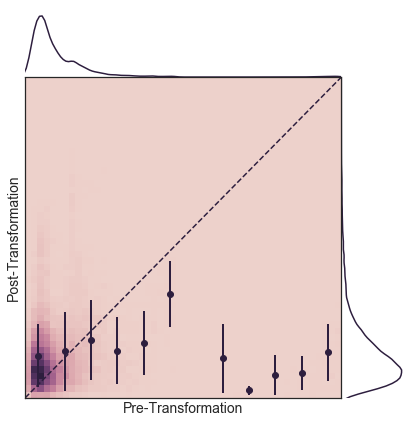

In [82]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

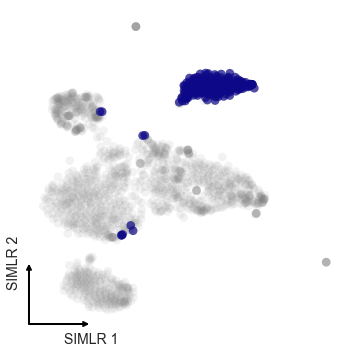

In [83]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='../inputs/retina_clu_seurat.csv')
retina_SIMLR.plot_barcodes(ranks=['5']) # rods & cones

In [84]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['5'],transform=None), post=retina_SIMLR.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['5']), post=retina_SIMLR.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'], final_distance_stats['Retina']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.2111
EMD: 0.0412
KLD: 0.5296
Knn Pres.: 82.875
CPU times: user 556 ms, sys: 18.7 ms, total: 575 ms
Wall time: 593 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.8 s, sys: 401 ms, total: 19.2 s
Wall time: 18.7 s


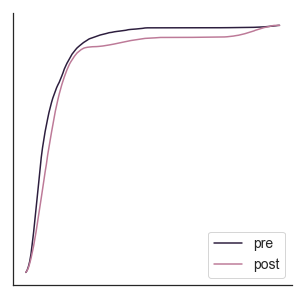

<Figure size 504x504 with 0 Axes>

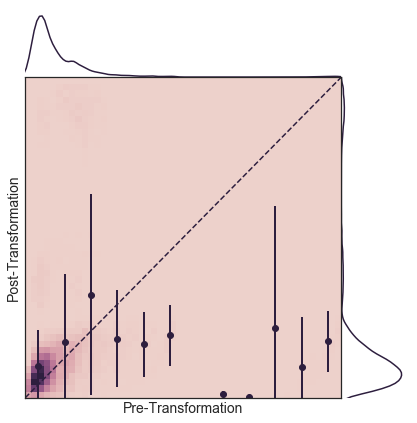

In [85]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
# Colon

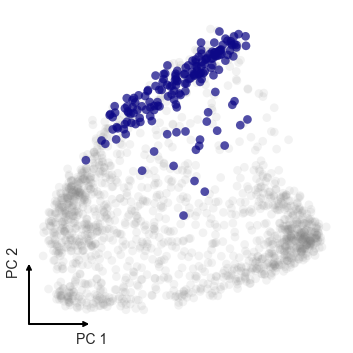

In [44]:
colon_PCA2 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=2)
colon_PCA2.plot_barcodes(ranks=['3']) # mature goblet cells

In [45]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA2.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA2.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (2)'], final_distance_stats['Colon']['EMD']['PCA (2)'], final_distance_stats['Colon']['KLD']['PCA (2)'], final_distance_stats['Colon']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.8724
EMD: 0.0574
KLD: 0.0965
Knn Pres.: 89.5087
CPU times: user 453 ms, sys: 27.9 ms, total: 481 ms
Wall time: 492 ms


CPU times: user 18.4 s, sys: 423 ms, total: 18.8 s
Wall time: 19 s


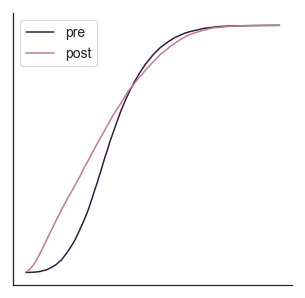

<Figure size 504x504 with 0 Axes>

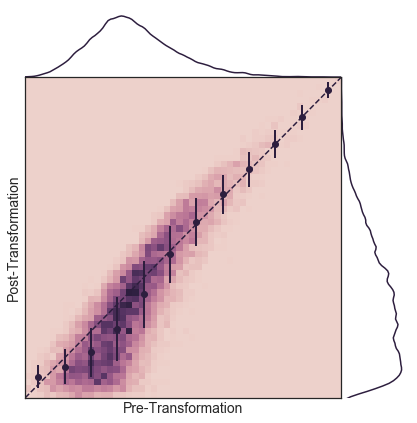

In [46]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

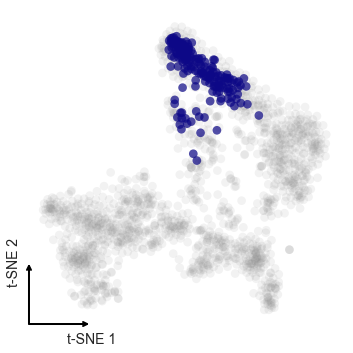

In [47]:
colon_tSNE = DR.from_file('pymethods_out/colon_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_tSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [48]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_tSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_tSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['KLD']['t-SNE'], final_distance_stats['Colon']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.8572
EMD: 0.0581
KLD: 0.089
Knn Pres.: 88.4014
CPU times: user 609 ms, sys: 36.8 ms, total: 646 ms
Wall time: 764 ms


CPU times: user 17.6 s, sys: 371 ms, total: 18 s
Wall time: 17.5 s


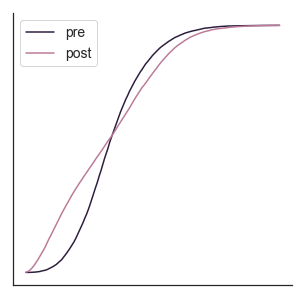

<Figure size 504x504 with 0 Axes>

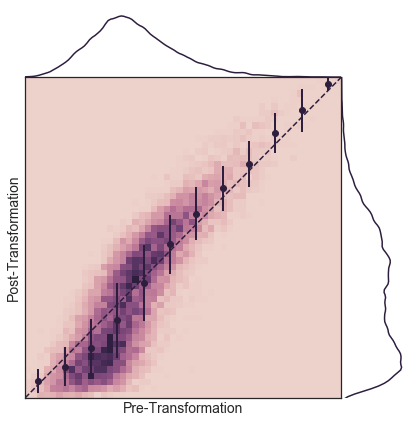

In [49]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

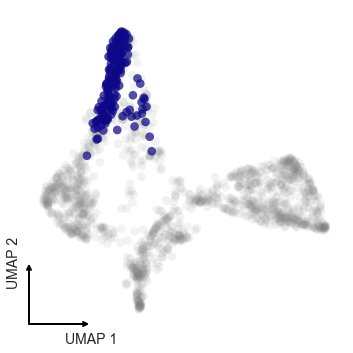

In [50]:
colon_UMAP = DR.from_file('pymethods_out/colon_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_UMAP.plot_barcodes(ranks=['3']) # rods & cones

In [51]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_UMAP.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_UMAP.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['KLD']['UMAP'], final_distance_stats['Colon']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.8473
EMD: 0.0587
KLD: 0.1044
Knn Pres.: 87.9377
CPU times: user 584 ms, sys: 50.6 ms, total: 634 ms
Wall time: 756 ms


CPU times: user 20.4 s, sys: 545 ms, total: 21 s
Wall time: 20.9 s


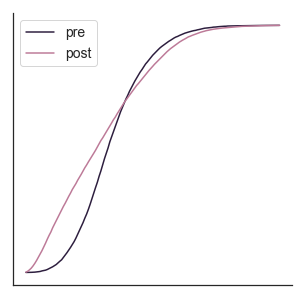

<Figure size 504x504 with 0 Axes>

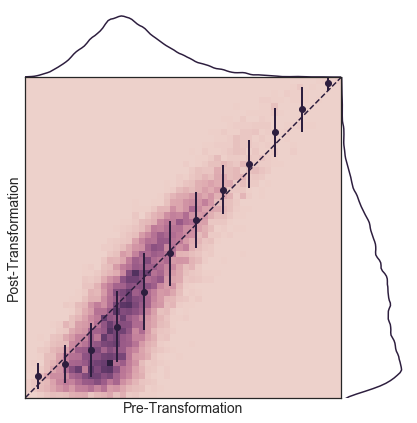

In [52]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

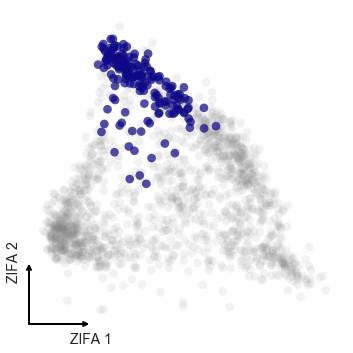

In [53]:
colon_ZIFA = DR.from_file('pymethods_out/colon_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_ZIFA.plot_barcodes(ranks=['3']) # mature goblet cells

In [54]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_ZIFA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_ZIFA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZIFA'], final_distance_stats['Colon']['EMD']['ZIFA'], final_distance_stats['Colon']['KLD']['ZIFA'], final_distance_stats['Colon']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.7952
EMD: 0.0617
KLD: 0.103
Knn Pres.: 85.6817
CPU times: user 558 ms, sys: 29.9 ms, total: 588 ms
Wall time: 661 ms


CPU times: user 20.4 s, sys: 546 ms, total: 21 s
Wall time: 21.1 s


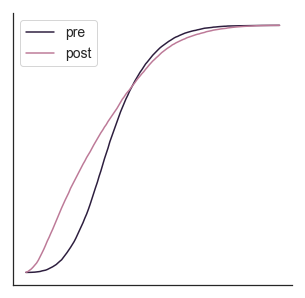

<Figure size 504x504 with 0 Axes>

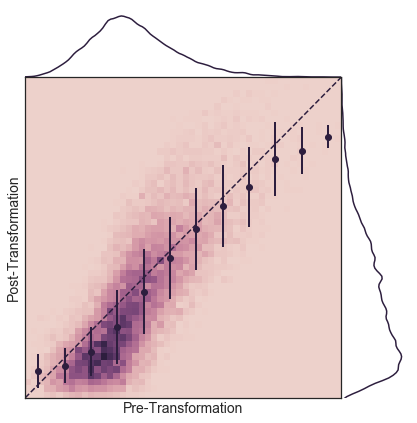

In [55]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

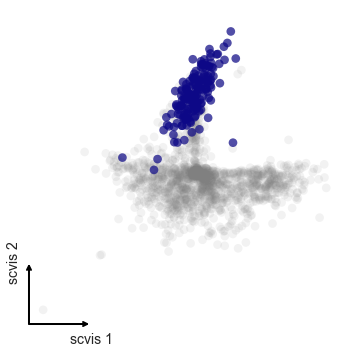

In [56]:
colon_scvis = DR.from_file('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_scvis.plot_barcodes(ranks=['3']) # mature goblet cells

In [57]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scvis.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scvis.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scvis'], final_distance_stats['Colon']['EMD']['scvis'], final_distance_stats['Colon']['KLD']['scvis'], final_distance_stats['Colon']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.8631
EMD: 0.0237
KLD: 0.0577
Knn Pres.: 94.9481
CPU times: user 456 ms, sys: 19.7 ms, total: 476 ms
Wall time: 488 ms


CPU times: user 20.6 s, sys: 487 ms, total: 21 s
Wall time: 21.6 s


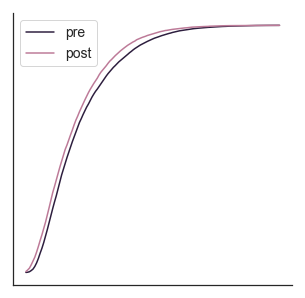

<Figure size 504x504 with 0 Axes>

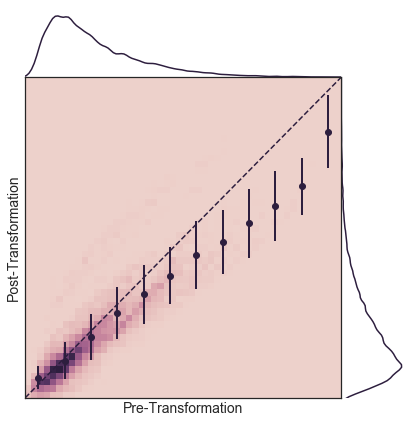

In [58]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

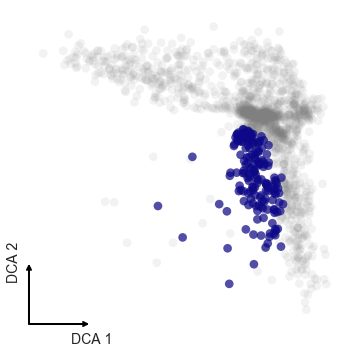

In [86]:
colon_DCA = DR.from_file('pymethods_out/colon_DCA.csv', name='DCA', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_DCA.plot_barcodes(ranks=['3']) # mature goblet cells
colon_DCA.plot_barcodes(ranks=['3'], figsize=(4,4), save_to='../images/goblet_DCA.png')

In [87]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_DCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_DCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['DCA'], final_distance_stats['Colon']['EMD']['DCA'], final_distance_stats['Colon']['KLD']['DCA'], final_distance_stats['Colon']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.0769
EMD: 0.0705
KLD: 0.3807
Knn Pres.: 73.0381
CPU times: user 463 ms, sys: 16.1 ms, total: 480 ms
Wall time: 487 ms


CPU times: user 19.3 s, sys: 377 ms, total: 19.6 s
Wall time: 19.1 s


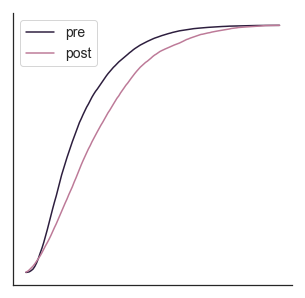

<Figure size 504x504 with 0 Axes>

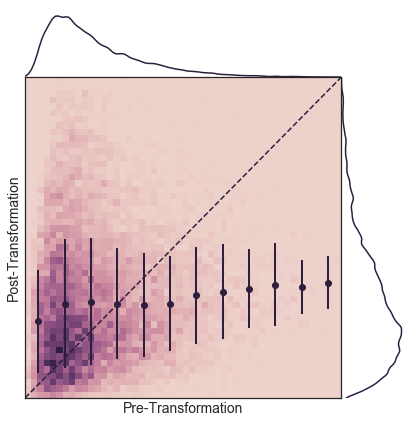

In [88]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

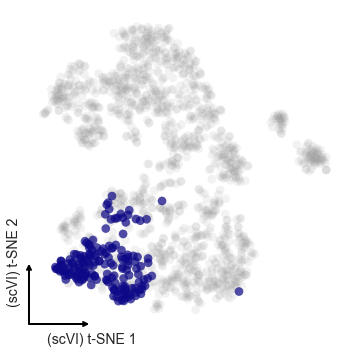

In [62]:
colon_scVI = DR.from_file('pymethods_out/colon_scVI.csv.gz', name='scVI', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_scVI_tSNE = DR.from_file('pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu_seurat.csv')
colon_scVI_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [63]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scVI.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scVI'], final_distance_stats['Colon']['EMD']['scVI'], final_distance_stats['Colon']['KLD']['scVI'], final_distance_stats['Colon']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.2994
EMD: 0.1424
KLD: 0.2078
Knn Pres.: 73.8754
CPU times: user 451 ms, sys: 18.4 ms, total: 469 ms
Wall time: 493 ms


CPU times: user 19.6 s, sys: 392 ms, total: 20 s
Wall time: 19.3 s


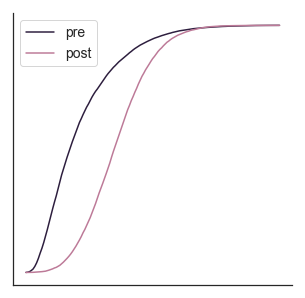

<Figure size 504x504 with 0 Axes>

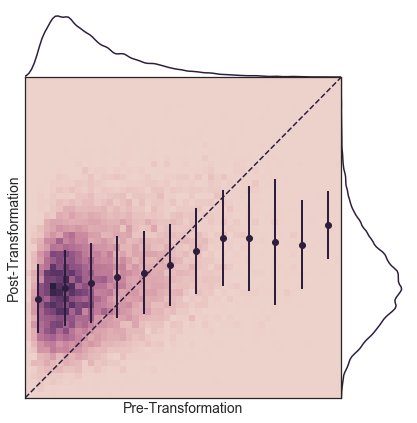

In [64]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

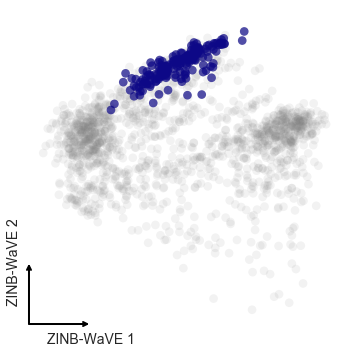

In [89]:
colon_ZINBWAVE = DR.from_file('Rmethods_out/colon_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_ZINBWAVE.plot_barcodes(ranks=['3']) # mature goblet cells

In [90]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_ZINBWAVE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_ZINBWAVE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZINBWAVE'], final_distance_stats['Colon']['EMD']['ZINBWAVE'], final_distance_stats['Colon']['KLD']['ZINBWAVE'], final_distance_stats['Colon']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.495
EMD: 0.0175
KLD: 0.2357
Knn Pres.: 75.7578
CPU times: user 437 ms, sys: 15.3 ms, total: 452 ms
Wall time: 440 ms


CPU times: user 18.9 s, sys: 382 ms, total: 19.3 s
Wall time: 18.8 s


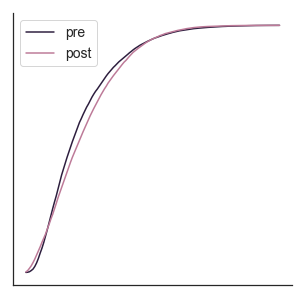

<Figure size 504x504 with 0 Axes>

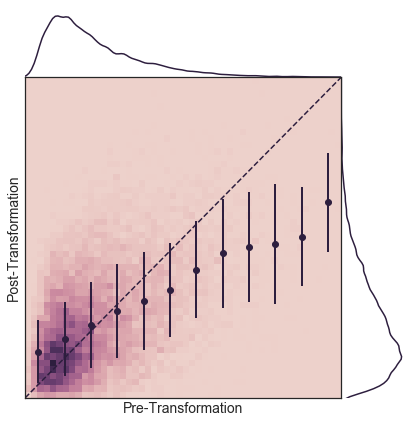

In [91]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

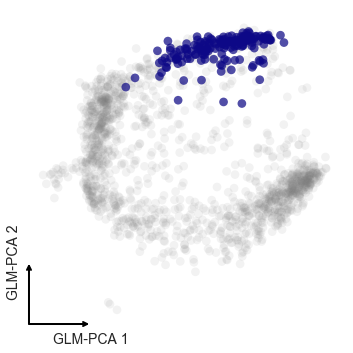

In [92]:
colon_GLMPCA = DR.from_file('Rmethods_out/colon_GLM-PCA.csv', name='GLM-PCA', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_GLMPCA.plot_barcodes(ranks=['3']) # mature goblet cells

In [93]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_GLMPCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_GLMPCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['GLMPCA'], final_distance_stats['Colon']['EMD']['GLMPCA'], final_distance_stats['Colon']['KLD']['GLMPCA'], final_distance_stats['Colon']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.4219
EMD: 0.0326
KLD: 0.2822
Knn Pres.: 75.5848
CPU times: user 410 ms, sys: 15.5 ms, total: 426 ms
Wall time: 405 ms


CPU times: user 19.3 s, sys: 370 ms, total: 19.7 s
Wall time: 19.4 s


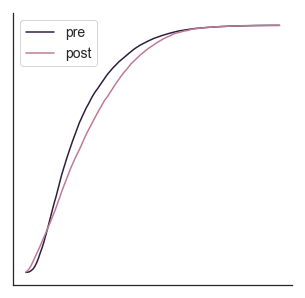

<Figure size 504x504 with 0 Axes>

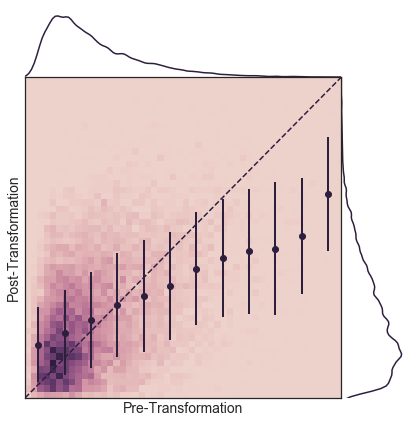

In [94]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

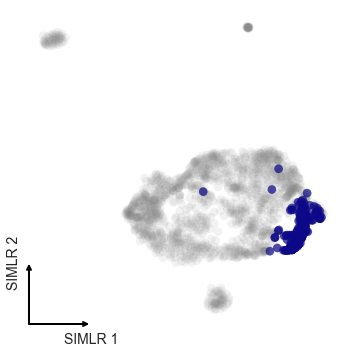

In [95]:
colon_SIMLR = DR.from_file('Rmethods_out/colon_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='../inputs/colon_clu_seurat.csv')
colon_SIMLR.plot_barcodes(ranks=['3']) # mature goblet cells

In [96]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_SIMLR.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_SIMLR.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['SIMLR'], final_distance_stats['Colon']['EMD']['SIMLR'], final_distance_stats['Colon']['KLD']['SIMLR'], final_distance_stats['Colon']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.4821
EMD: 0.032
KLD: 0.2468
Knn Pres.: 79.5156
CPU times: user 497 ms, sys: 19 ms, total: 516 ms
Wall time: 514 ms


CPU times: user 20 s, sys: 399 ms, total: 20.4 s
Wall time: 19.9 s


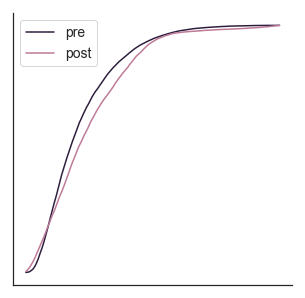

<Figure size 504x504 with 0 Axes>

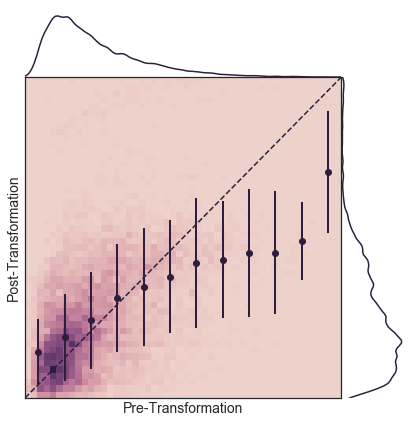

In [97]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)